In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import glob
import torch

import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Check if the file is corrupted or not
def validate_video(vid_path, train_transforms):
    transform = train_transforms
    count = 20
    video_path = vid_path
    frames = []
    a = int(100/count)
    first_frame = np.random.randint(0,a)
    temp_video = video_path.split('/')[-1]
    for i, frame in enumerate(frame_extract(video_path)):
        frames.append(transform(frame))
        if(len(frames) == count):
            break
    frames = torch.stack(frames)
    frames = frames[:count]
    return frames

# Extract a frame from video
def frame_extract(path):
    vidObj = cv2.VideoCapture(path)
    success = 1
    while success:
        success, image = vidObj.read()
        if success:
            yield image

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

video_fil =  glob.glob('/content/drive/MyDrive/deep fake/Small_data_set/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/Celeb_real_face_only/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
# video_fil += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')
print("Total no of videos:", len(video_fil))
print(video_fil)
count = 0
for i in video_fil:
    try:
        count += 1
        validate_video(i, train_transforms)
    except:
        print("Number of video processed:", count, "Remaining:", (len(video_fil) - count))
        print("Corrupted video is:", i)
        continue
print("Number of corrupted videos:", (len(video_fil) - count))



Total no of videos: 220
['/content/drive/MyDrive/deep fake/Small_data_set/Copy of 995.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 997_040.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 996.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 996_056.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 998.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 999_960.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 995_233.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 998_561.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 997.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 991.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 994.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 992.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 992_980.mp4', '/content/drive/MyDrive/deep fake/Small_data_set/Copy of 990_008.mp4', '/content

In [3]:
import json
import glob
import numpy as np
import cv2
import copy
import random

# video_files = glob.glob('/content/drive/MyDrive/deep fake/FF_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/Celeb_real_face_only/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_FAKE_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/DFDC_REAL_Face_only_data/*.mp4')
# video_files += glob.glob('/content/drive/My Drive/FF_Face_only_data/*.mp4')

random.shuffle(video_fil)
random.shuffle(video_fil)

frame_count = []

# Function to load videos into memory
def load_videos(video_fil):
    videos = []
    for video_file in video_fil:
        cap = cv2.VideoCapture(video_file)
        if int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) < 100:
            continue
        frames = []
        success, frame = cap.read()
        while success:
            # Preprocess frame if necessary
            # frame = preprocess_frame(frame)
            frames.append(frame)
            success, frame = cap.read()
        videos.append(frames)
    return videos

videos = load_videos(video_fil)

for video in videos:
    frame_count.append(len(video))

print("Frames per video:", frame_count)
print("Total number of videos:", len(frame_count))
print('Average frames per video:', np.mean(frame_count))

Frames per video: [148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 148, 1

In [14]:
import torch

!pip3 install face_recognition
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import Dataset
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import face_recognition

class video_dataset(Dataset):
    def __init__(self, video_names, labels, sequence_length=60, transform=None):
        self.video_names = video_names
        self.labels = labels
        self.transform = transform
        self.count = sequence_length

    def __len__(self):
        return len(self.video_names)

    def __getitem__(self, idx):
        video_path = self.video_names[idx]
        frames = []
        a = int(100 / self.count)
        first_frame = np.random.randint(0, a)
        temp_video = os.path.basename(video_path)  # Get the filename without directory
        label = self.labels.loc[self.labels["file"] == temp_video, "label"].iloc[0]
        label = 0 if label == 'FAKE' else 1
        for i, frame in enumerate(self.frame_extract(video_path)):
            frames.append(self.transform(frame))
            if len(frames) == self.count:
                break
        frames = torch.stack(frames)
        frames = frames[:self.count]
        return frames, label

    def frame_extract(self, path):
        vidObj = cv2.VideoCapture(path)
        success = 1
        while success:
            success, image = vidObj.read()
            if success:
                yield image

# Plot the image
def im_plot(tensor):
    image = tensor.cpu().numpy().transpose(1, 2, 0)
    b, g, r = cv2.split(image)
    image = cv2.merge((r, g, b))
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = image * 255.0
    plt.imshow(image.astype(int))
    plt.show()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=5f469377901c748b0de21e506cc0dc1372f6fe7ff7ecf3eb6d0eafe7a094b804
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


RuntimeError: Error while calling cudaGetDevice(&the_device_id) in file /tmp/pip-install-0fc_u96s/dlib_1cab67c14dfc4155b9e84848fc438d20/dlib/cuda/gpu_data.cpp:204. code: 35, reason: CUDA driver version is insufficient for CUDA runtime version

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


train: 154
test: 66


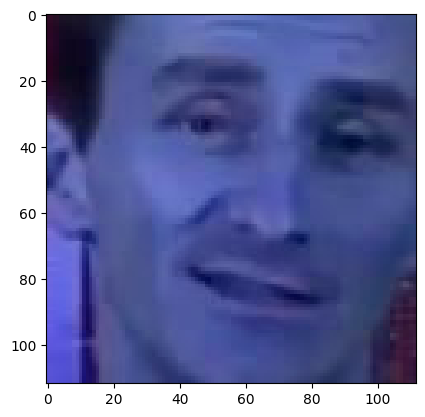

In [6]:
import random
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt  # Import matplotlib for image plotting

header_list = ["file", "label"]
labels = pd.read_csv('/content/drive/MyDrive/deep fake/Small_data_set/Small_metadata.csv', names=header_list)

# Assuming you have defined the video_files list somewhere

train_videos = video_fil[:int(0.7 * len(video_fil))]
valid_videos = video_fil[int(0.7 * len(video_fil)):]
print("train:", len(train_videos))
print("test:", len(valid_videos))

# Assuming you have defined the number_of_real_and_fake_videos function somewhere
# print("TRAIN: ", "Real:", number_of_real_and_fake_videos(train_videos)[0], " Fake:", number_of_real_and_fake_videos(train_videos)[1])
# print("TEST: ", "Real:", number_of_real_and_fake_videos(valid_videos)[0], " Fake:", number_of_real_and_fake_videos(valid_videos)[1])

im_size = 112
mean = [0.485, 0.456, 0.406]
std = [0.229, 0.224, 0.225]

train_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

test_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((im_size, im_size)),
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

train_data = video_dataset(train_videos, labels, sequence_length=10, transform=train_transforms)
val_data = video_dataset(valid_videos, labels, sequence_length=10, transform=train_transforms)

train_loader = DataLoader(train_data, batch_size=4, shuffle=True, num_workers=4)
valid_loader = DataLoader(val_data, batch_size=4, shuffle=True, num_workers=4)

# Plot the image
def im_plot(tensor):
    image = tensor.numpy().transpose(1, 2, 0)
    image = image * [0.22803, 0.22145, 0.216989] + [0.43216, 0.394666, 0.37645]
    image = image * 255.0
    plt.imshow(image.astype(int))
    plt.show()

# Assuming im_plot is a function defined elsewhere for plotting images
# image, label = train_data[0]

# Convert tensor to numpy array and adjust values for proper plotting
image,label = train_data[0]
im_plot(image[0,:,:,:])


In [7]:
import torch
from torch import nn
import numpy as np
import torchvision.models as models

class Model(nn.Module):
    def __init__(self, num_classes, latent_dim=2048, lstm_layers=1, hidden_dim=2048, bidirectional=False):
        super(Model, self).__init__()
        # Load ResNeXt model without pretrained weights
        model = models.resnext50_32x4d(pretrained=False)
        # Remove the fully connected layer at the end
        self.model = nn.Sequential(*list(model.children())[:-2])
        self.lstm = nn.LSTM(latent_dim, hidden_dim, lstm_layers, bidirectional)
        self.relu = nn.LeakyReLU()
        self.dp = nn.Dropout(0.4)
        self.linear1 = nn.Linear(2048, num_classes)
        self.avgpool = nn.AdaptiveAvgPool2d(1)

    def forward(self, x):
        batch_size, seq_length, c, h, w = x.shape
        x = x.view(batch_size * seq_length, c, h, w)
        fmap = self.model(x)
        x = self.avgpool(fmap)
        x = x.view(batch_size, seq_length, 2048)
        x_lstm, _ = self.lstm(x, None)
        return fmap, self.dp(self.linear1(torch.mean(x_lstm, dim=1)))


In [8]:
model = Model(2)
# Create a tensor on the CPU
tensor = torch.from_numpy(np.empty((1, 20, 3, 112, 112))).type(torch.FloatTensor)
# Pass the tensor to the model
a, b = model(tensor)



/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [9]:




import torch
from torch.autograd import Variable
import time
import os
import sys

def train_epoch(epoch, num_epochs, data_loader, model, criterion, optimizer):
    model.train()
    losses = AverageMeter()
    accuracies = AverageMeter()

    for i, (inputs, targets) in enumerate(data_loader):
        _, outputs = model(inputs)
        loss = criterion(outputs, targets)
        acc = calculate_accuracy(outputs, targets)

        losses.update(loss.item(), inputs.size(0))
        accuracies.update(acc, inputs.size(0))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        sys.stdout.write(
            "\r[Epoch %d/%d] [Batch %d/%d] [Loss: %.4f, Acc: %.2f%%]"
            % (
                epoch,
                num_epochs,
                i,
                len(data_loader),
                losses.avg,
                accuracies.avg
            )
        )

    return losses.avg, accuracies.avg

def test(epoch, model, data_loader, criterion):
    print('Testing')
    model.eval()
    losses = AverageMeter()
    accuracies = AverageMeter()
    pred = []
    true = []

    with torch.no_grad():
        for i, (inputs, targets) in enumerate(data_loader):
            _, outputs = model(inputs)
            loss = criterion(outputs, targets)
            acc = calculate_accuracy(outputs, targets)

            _, p = torch.max(outputs, 1)
            true += targets.detach().cpu().numpy().reshape(len(targets)).tolist()
            pred += p.detach().cpu().numpy().reshape(len(p)).tolist()

            losses.update(loss.item(), inputs.size(0))
            accuracies.update(acc, inputs.size(0))

            sys.stdout.write(
                "\r[Batch %d/%d] [Loss: %.4f, Acc: %.2f%%]"
                % (
                    i,
                    len(data_loader),
                    losses.avg,
                    accuracies.avg
                ) )

        print('\nAccuracy {}'.format(accuracies.avg))

    return true, pred, losses.avg, accuracies.avg

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def calculate_accuracy(outputs, targets):
    batch_size = targets.size(0)

    _, pred = outputs.topk(1, 1, True)
    pred = pred.t()
    correct = pred.eq(targets.view(1, -1))
    n_correct_elems = correct.float().sum().item()

    return 100 * n_correct_elems / batch_size


In [10]:


import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def print_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])
    print('\n')
    df_cm = pd.DataFrame(cm, range(2), range(2))
    sn.set(font_scale=1.4)  # for label size
    sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})  # font size
    plt.ylabel('Actual label', size=20)
    plt.xlabel('Predicted label', size=20)
    plt.xticks(np.arange(2), ['Fake', 'Real'], size=16)
    plt.yticks(np.arange(2), ['Fake', 'Real'], size=16)
    plt.ylim([2, 0])
    plt.show()
    calculated_acc = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])
    print("Calculated Accuracy", calculated_acc * 100)
import matplotlib.pyplot as plt

def plot_loss(train_loss_avg, test_loss_avg, num_epochs):
    loss_train = train_loss_avg
    loss_val = test_loss_avg
    print(num_epochs)
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, loss_train, 'g', label='Training loss')
    plt.plot(epochs, loss_val, 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

def plot_accuracy(train_accuracy, test_accuracy, num_epochs):
    loss_train = train_accuracy
    loss_val = test_accuracy
    epochs = range(1, num_epochs + 1)
    plt.plot(epochs, loss_train, 'g', label='Training accuracy')
    plt.plot(epochs, loss_val, 'b', label='Validation accuracy')
    plt.title('Training and Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

In [11]:

from sklearn.metrics import confusion_matrix
#learning rate
lr = 1e-5#0.001
#number of epochs
num_epochs = 3

optimizer = torch.optim.Adam(model.parameters(), lr= lr,weight_decay = 1e-5)

#class_weights = torch.from_numpy(np.asarray([1,15])).type(torch.FloatTensor).cuda()
#criterion = nn.CrossEntropyLoss(weight = class_weights).cuda()
criterion = nn.CrossEntropyLoss().cuda()
train_loss_avg =[]
train_accuracy = []
test_loss_avg = []
test_accuracy = []
for epoch in range(1,num_epochs+1):
    l, acc = train_epoch(epoch,num_epochs,train_loader,model,criterion,optimizer)
    train_loss_avg.append(l)
    train_accuracy.append(acc)
    true,pred,tl,t_acc = test(epoch,model,valid_loader,criterion)
    test_loss_avg.append(tl)
    test_accuracy.append(t_acc)
plot_loss(train_loss_avg,test_loss_avg,len(train_loss_avg))
plot_accuracy(train_accuracy,test_accuracy,len(train_accuracy))
print(confusion_matrix(true,pred))
print_confusion_matrix(true,pred)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


TypeError: Caught TypeError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/worker.py", line 308, in _worker_loop
    data = fetcher.fetch(index)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/fetch.py", line 54, in fetch
    return self.collate_fn(data)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 277, in default_collate
    return collate(batch, collate_fn_map=default_collate_fn_map)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 144, in collate
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 144, in <listcomp>
    return [collate(samples, collate_fn_map=collate_fn_map) for samples in transposed]  # Backwards compatibility.
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/_utils/collate.py", line 152, in collate
    raise TypeError(default_collate_err_msg_format.format(elem_type))
TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'NoneType'>
